<a href="https://colab.research.google.com/github/dnjswnsthd/bnk_py/blob/develop/1_WS_Linearl_Boston_Q_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [WS]Boston 주택 가격 선형 모델 만들기
Boston 주택 가격 데이타를 분석해서 가장 좋은 결과의 선형 모델을 만든다.

# import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.datasets import  load_boston


# Data 준비 및 EDA

## 데이타 셑 로딩
* `load_boston()`
* data frame 생성

In [ ]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Target Data Column DF에 추가하기
* target column 추가 : 'Price'

In [ ]:
df['target'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 결측지 확인
* 컬럼 당 NaN이 있는 건수 확인

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

## Target 데이타의 분포 확인
* seaborn의 distplot으로 'Price'의 분포 확인

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


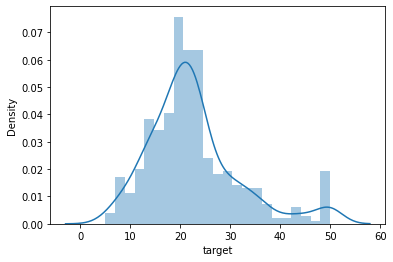

In [ ]:
sns.distplot(df['target'])

## 각 변수들 간의 상관 관계 분석
* `df.corr()` 함수로 모든 변수들 간의 상관 관계 분석
* seaborn의 heatmap으로 상관 관계 표시

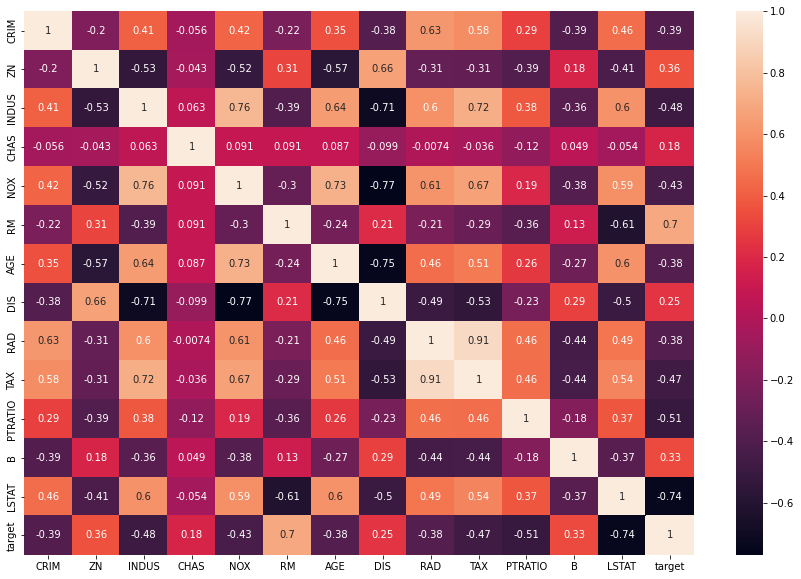

In [ ]:
df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

## 상관 관계가 매우 높은 중복 독립 변수 제거
* 'RAD'와 'TAX'간의 상관관계가 0.91로 매우 높기 때문에 독립적으로 보기 어렵다
* 두 변수 중에 'Price'와 상관 관계가 상대적으로 낮은 'RAD'를 제거한다.

In [ ]:
df.drop('RAD', axis=1, inplace=True)
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

# 데이터 분할
* `test_size=0.3`
* `random_state=1`

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 12), (152, 12), (354,), (152,))

# StandardScale + LinearRegression

In [ ]:
pipe = Pipeline([('std', StandardScaler()), ('reg', LinearRegression())])
pipe.fit(X_train, y_train)
print('R2 train:', pipe.score(X_train, y_train), 'R2 Test:', pipe.score(X_test, y_test))

R2 train: 0.699633903997704 R2 Test: 0.7707307499183388


# 각 Feaure와 target들 간의 산점도 매트릭스 그리기
* `sns.pairplot()`을 이용해서 산점도 매트릭스 그리기

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

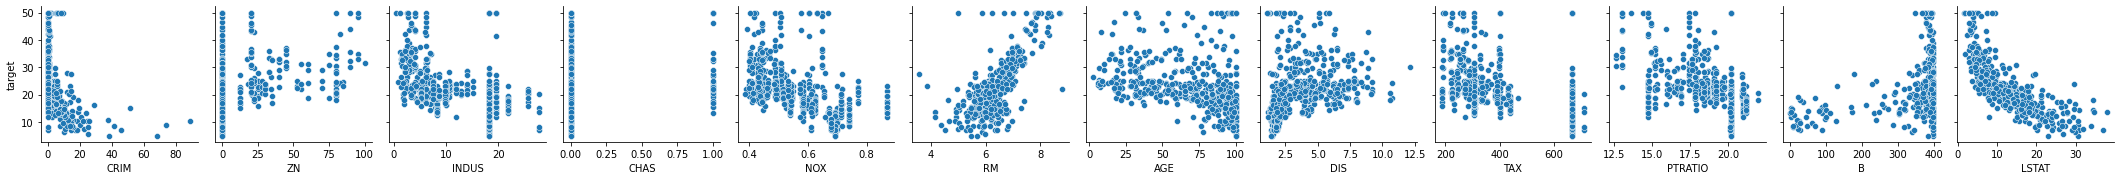

In [ ]:
sns.pairplot(df, x_vars=df.columns[:-1], y_vars='target')

# Polynomial 
* 1차식으로 표현할 수 없는 변수 확인
* 표준화된 입력 변수로 `PolynomialFeatures()`로 2차 다항식 변환

In [ ]:
pipe = Pipeline([('std', StandardScaler()),
                 ('poly', PolynomialFeatures(2, include_bias=False)),
                 ('reg', LinearRegression())])
pipe.fit(X_train, y_train)
print('R2 train:', pipe.score(X_train, y_train), 'R2 Test:', pipe.score(X_test, y_test))

R2 train: 0.9185567224585711 R2 Test: 0.8060741029945258


# Ridge 
* 과적합이 의심 되므로 Ridge 규제 적용
* alpha = 5

In [ ]:
pipe = Pipeline([('std', StandardScaler()),
                 ('poly', PolynomialFeatures(2, include_bias=False)),
                 ('reg', Ridge(alpha=5))])
pipe.fit(X_train, y_train)
print('R2 train:', pipe.score(X_train, y_train), 'R2 Test:', pipe.score(X_test, y_test))

R2 train: 0.9111401072338045 R2 Test: 0.873125915679829


# Cross Validation
* cv=5

In [ ]:
scores = cross_val_score(pipe, X_train, y_train, cv=5)
print('scores:', scores, 'mean score:', scores.mean())

scores: [0.72599557 0.82989426 0.80405143 0.91724554 0.79954876] mean score: 0.8153471113747035


# GridSearchCV로 hyper parameter turning
* Polynomial degree = 2~4
* alpha = 1 ~ 20
* cv=5

In [ ]:
pipe = Pipeline([('std', StandardScaler()),
                 ('poly', PolynomialFeatures( include_bias=False)),
                 ('reg', Ridge())])
gcv = GridSearchCV(pipe, {'poly__degree':[2, 3, 4], 'reg__alpha':range(1, 20)}, cv=5)
gcv.fit(X_train, y_train)
display(pd.DataFrame(gcv.cv_results_))
print('best params:', gcv.best_params_)

print('R2 Train:', gcv.score(X_train, y_train), 'R2 Test:', gcv.score(X_test, y_test))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,param_reg__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008635,0.002890,0.002021,0.000201,2,1,"{'poly__degree': 2, 'reg__alpha': 1}",0.757240,0.801165,0.772901,0.914022,0.775678,0.804201,0.056690,19
1,0.015489,0.004666,0.002093,0.000084,2,2,"{'poly__degree': 2, 'reg__alpha': 2}",0.747415,0.814093,0.790948,0.917648,0.786309,0.811283,0.057337,11
2,0.013493,0.002094,0.002007,0.000118,2,3,"{'poly__degree': 2, 'reg__alpha': 3}",0.739141,0.821283,0.798598,0.918292,0.792483,0.813959,0.058709,6
3,0.014246,0.004483,0.002337,0.000233,2,4,"{'poly__degree': 2, 'reg__alpha': 4}",0.732107,0.826195,0.802274,0.917985,0.796600,0.815032,0.060171,3
4,0.010488,0.005840,0.002242,0.000314,2,5,"{'poly__degree': 2, 'reg__alpha': 5}",0.725996,0.829894,0.804051,0.917246,0.799549,0.815347,0.061572,1
5,0.009565,0.003463,0.003336,0.001668,2,6,"{'poly__degree': 2, 'reg__alpha': 6}",0.720589,0.832839,0.804812,0.916276,0.801754,0.815254,0.062877,2
6,0.008008,0.004447,0.001945,0.000098,2,7,"{'poly__degree': 2, 'reg__alpha': 7}",0.715737,0.835266,0.804990,0.915173,0.803451,0.814923,0.064081,4
7,0.007118,0.001378,0.002031,0.000239,2,8,"{'poly__degree': 2, 'reg__alpha': 8}",0.711331,0.837317,0.804817,0.913991,0.804779,0.814447,0.065194,5
8,0.009987,0.005136,0.002232,0.000511,2,9,"{'poly__degree': 2, 'reg__alpha': 9}",0.707292,0.839082,0.804427,0.912762,0.805831,0.813879,0.066224,7
9,0.014830,0.003597,0.002886,0.000469,2,10,"{'poly__degree': 2, 'reg__alpha': 10}",0.703559,0.840623,0.803901,0.911506,0.806669,0.813252,0.067181,8


best params: {'poly__degree': 2, 'reg__alpha': 5}
R2 Train: 0.9111401072338045 R2 Test: 0.873125915679829


In [ ]:
from sklearn.linear_model import Lasso
pipe = Pipeline([('std', StandardScaler()),
                 ('poly', PolynomialFeatures( include_bias=False)),
                 ('reg', Lasso())])
gcv = GridSearchCV(pipe, {'poly__degree':[2, 3, 4], 'reg__alpha':np.arange(0.04, 0.07, 0.005)}, cv=5)
gcv.fit(X_train, y_train)
display(pd.DataFrame(gcv.cv_results_))
print('best params:', gcv.best_params_)

print('R2 Train:', gcv.score(X_train, y_train), 'R2 Test:', gcv.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.169e+01, tolerance: 2.388e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.117e+01, tolerance: 2.248e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa